## Exploratory data analysis of English Premier League Players

As a dedicated follower of the Premier League and a recent graduate of data analysis, I've always envisioned using my newfound skills to explore the world of football. This project fulfills that dream, allowing me to analyze datasets and uncover fascinating trends within the game I love. Football, and especially the Premier League, has captivated me for years. Now, with my data analysis training, I'm able to combine my passion with my professional skills. This project is a testament to that, offering a chance to delve deeper into the captivating world of football through the lens of data analysis.

### Objectives:
#### Exploratory data anlysis on English Premier League players dataset.
#### Apply data visualization techniques using visualization library.

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading dataset into the dataframe

In [2]:
df = pd.read_csv(r"C:\Users\91813\Dropbox\PC\Downloads\premier league player.csv", )
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [3]:
print('The shape of the data is {}'.format(df.shape)) #defining the shape of the dataset
print('The size of the data is {}'.format(df.size)) #defining the total size of the data

The shape of the data is (571, 59)
The size of the data is 33689


In [3]:
#showcasing the list of columns
df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [5]:
numeric_data = df.drop(['Name', 'Club','Position', 'Nationality','Cross accuracy %','Tackle success %','Shooting accuracy %'], axis=1)

The first and foremost need to check if there is any null values in the dataset which will affect the analysis.

In [6]:
df.isnull()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False


i have found that there is null values in column Jersey Number, a rule in football is that a player should have a jersey number is he is playing for the team. There are around 8 people with no jersey number need to drop that column.

In [7]:
df[df['Jersey Number'].isnull()]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
57,Bertrand Traoré,NaN,Aston-Villa,Forward,Burkina Faso,25.0,10,2,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,5.0
127,Juan Castillo,NaN,Chelsea,Defender,Netherlands,20.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
145,Nathan Ferguson,NaN,Crystal-Palace,Defender,England,19.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
280,Cengiz Ünder,NaN,Leicester-City,Midfielder,Turkey,23.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
322,Zack Steffen,NaN,Manchester-City,Goalkeeper,United States,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
332,Patrick Roberts,NaN,Manchester-City,Midfielder,England,23.0,6,0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2,0.0
348,Lee Grant,NaN,Manchester-United,Goalkeeper,England,37.0,31,10,12,0,...,21.0,24.0,16.0,21.0,114.0,301.0,1,0,0,NaN
473,Cameron Carter-Vickers,NaN,Tottenham-Hotspur,Defender,United States,22.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [8]:
df = df.dropna(subset=['Jersey Number']) #updating the column in the data frame by removing the null values.

In [9]:
df['Jersey Number'].isnull().sum() #checking if the code worked properly

0

In [10]:
df['Jersey Number'] = df['Jersey Number'].astype(int) #the data type of column jersey number is a float value need to change it to an integer

In [11]:
df['Jersey Number'].dtype #the data type has been changed to int

dtype('int32')

In [12]:
sorted_values=df.sort_values(by='Jersey Number') #sorting the values in the column jersey number

In [13]:
sorted_values['Jersey Number'].unique() #extracting only the unique values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52,
       53, 54, 55, 56, 57, 58, 59, 62, 66, 67, 69, 71, 72, 73, 76, 82])

In [15]:
df.describe() #describing the numerical dataset to understand the outline of the data

,Jersey Number,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
count,563.000000,562.000000,563.000000,563.000000,563.000000,563.000000,306.000000,496.000000,496.000000,496.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,563.000000,563.000000,563.000000,496.000000
mean,19.534636,25.811388,69.717584,29.348135,24.197158,7.428064,2.654118,1.431452,4.522177,2.413306,...,25.074627,46.880597,21.164179,26.014925,214.567164,422.014925,8.026643,0.305506,53.777975,11.187500
std,14.273515,4.360331,82.020787,39.104881,28.573471,16.908159,8.036430,3.450566,11.104077,6.329069,...,46.876470,83.329671,43.625332,47.936983,338.635865,648.692309,11.602138,0.702630,75.880821,26.705788
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,22.000000,3.500000,1.000000,2.000000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,26.000000,37.000000,13.000000,14.000000,1.000000,0.140000,0.000000,1.000000,0.000000,...,2.000000,6.000000,3.000000,4.000000,39.000000,53.000000,3.000000,0.000000,23.000000,2.000000
75%,27.000000,29.000000,110.000000,42.000000,37.000000,7.000000,0.382500,1.000000,4.000000,2.000000,...,31.500000,47.000000,17.000000,28.000000,305.000000,554.000000,11.000000,0.000000,76.500000,9.000000
max,82.000000,38.000000,539.000000,272.000000,158.000000,180.000000,57.000000,31.000000,127.000000,63.000000,...,269.000000,391.000000,249.000000,257.000000,1516.000000,2806.000000,81.000000,5.000000,438.000000,203.000000


First we begin with the analysis according to the country

The puprpose is to know players from which country is performing well in premier league, If i was the manager of any of the permier league clubs i would prefer sign players from that particular country.Just joking!

In [16]:
df['Nationality'].value_counts().head() #Finding out the number of players from each of the nationality.
#since premier league happens in england more players will be from that particular country.

Nationality
England    218
France      30
Spain       28
Brazil      24
Ireland     24
Name: count, dtype: int64

In [4]:
# To view the average wins, losses, goals and goals per match with respect to players from different nationality
by_country = df.pivot_table(index='Nationality', values=['Wins', 'Losses', 'Goals', 'Goals per match'], aggfunc=np.mean)

C:\Users\91813\AppData\Local\Temp\ipykernel_32724\2321808990.py:1: FutureWarning: The provided callable <function mean at 0x000002376EAB39A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  by_country = df.pivot_table(index='Nationality', values=['Wins', 'Losses', 'Goals', 'Goals per match'], aggfunc=np.mean)


I would have definately sign some south korean players, would love to know there tactics.

In [6]:
# showcasing the pivot table by goals in descending order
goal_scoring_country = by_country.sort_values(by='Goals',ascending=False).head(10)
goal_scoring_country

,Goals,Goals per match,Losses,Wins
Nationality,,,,
South Korea,57.000000,0.350000,36.000000,95.000000
New Zealand,36.000000,0.340000,43.000000,35.000000
Senegal,33.333333,0.236667,37.666667,62.666667
Mexico,32.000000,0.410000,23.000000,32.000000
Gabon,28.500000,0.335000,23.500000,25.500000
Iceland,22.666667,0.140000,51.333333,47.333333
Algeria,22.000000,0.183333,29.333333,39.000000
Egypt,18.400000,15.933333,30.200000,36.400000
Argentina,17.692308,7.788000,21.538462,42.923077


In [18]:
# To view the average wins, losses, goals and goals per match with respect to players from different nationality

by_players = df.pivot_table(index='Name', values=['Appearances','Wins', 'Losses', 'Goals', 'Goals per match'], 
                            aggfunc=np.sum)


C:\Users\91813\AppData\Local\Temp\ipykernel_29900\239445776.py:1: FutureWarning: The provided callable <function sum at 0x0000022EFEFE1C60> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  by_players = df.pivot_table(index='Name', values=['Appearances','Wins', 'Losses', 'Goals', 'Goals per match'],


If you are a football fan you will be aware how good is Sergio Agureo. He has been in premierleage for a pretty long time, he has most appearances in the top 5 goal scoring players

In [19]:
# showcasing the pivot table by goals in descending order

by_players.sort_values('Goals',ascending=False)

,Appearances,Goals,Goals per match,Losses,Wins
Name,,,,,
Sergio Agüero,263,180,0.68,44,177
Harry Kane,212,144,0.68,48,120
Jamie Vardy,213,105,0.49,77,86
Olivier Giroud,238,86,0.36,56,133
Sadio Mané,196,86,0.44,35,121
...,...,...,...,...,...
Dara O'Shea,2,0,0.00,2,0
Darnell Furlong,5,0,0.00,5,0
Lovre Kalinic,0,0,0.00,0,0


<Axes: xlabel='Nationality'>

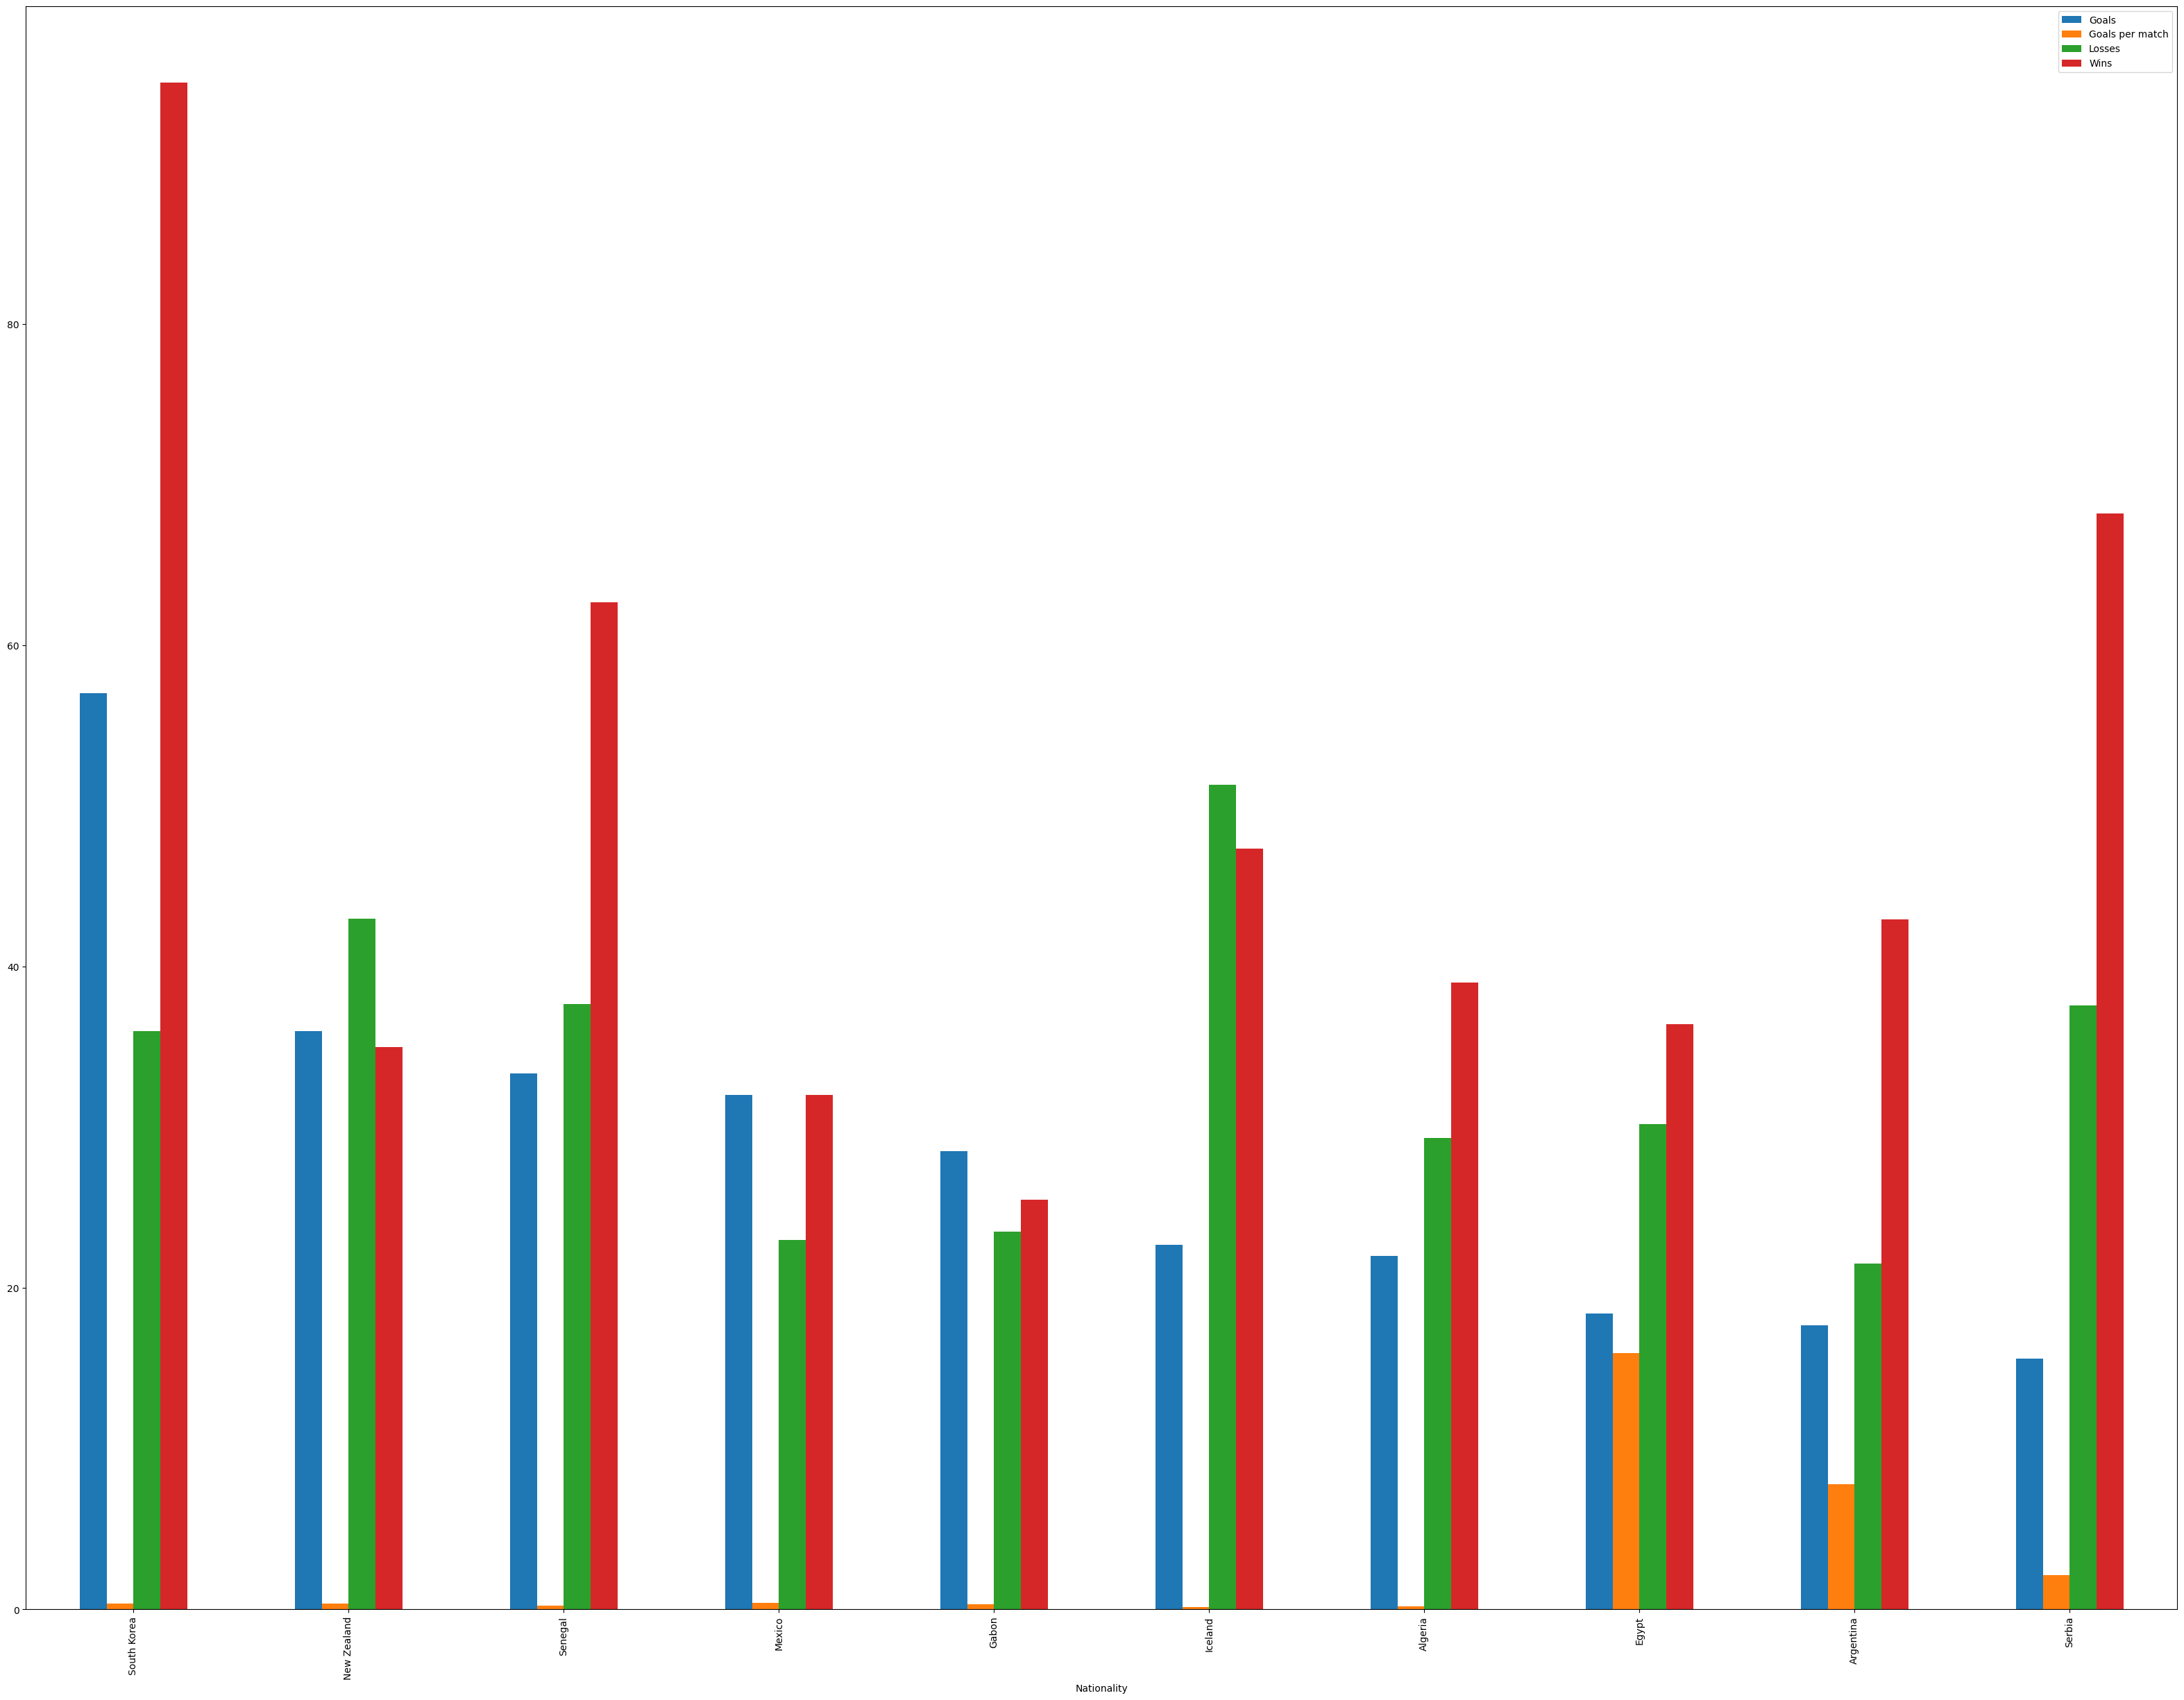

In [21]:
goal_scoring_country.plot(kind='bar', figsize=(40,30)) #plotted a chart by countries with showing various bars such as average wins, losses, goals and goals per match

Text(0, 0.5, 'Total Goals')

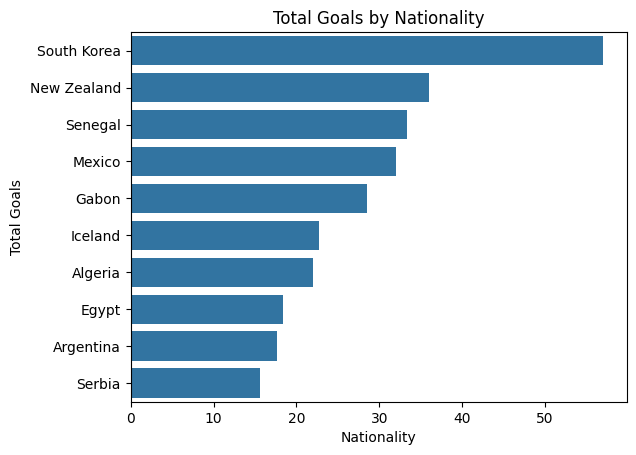

In [22]:
#showing only the goal scored by players from various countries and south korea tops the list.
sns.barplot(data=goal_scoring_country, x='Goals', y='Nationality')
plt.title('Total Goals by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Total Goals')

In [15]:
#the main factor which matters most in football is scoring goals and providing assists
df['Total chances'] = df['Goals'] + df['Assists']
df['Total chances']

0       0
1       0
2       0
3      25
4       2
       ..
566     7
567    45
568    17
569     0
570     0
Name: Total chances, Length: 571, dtype: int64

In [16]:
df['Total chances'].isnull().sum() #checking if there is any null values

0

In [17]:
jersey_num_means = df.groupby('Jersey Number')['Total chances'].mean() #grouping the jersey number with respect to the total chances to know which jersey number in league is performing good in the league

In [18]:
jersey_num_total_chances = jersey_num_means.sort_values(ascending=False) #sorting the values by jersey number to have abetter visualisation

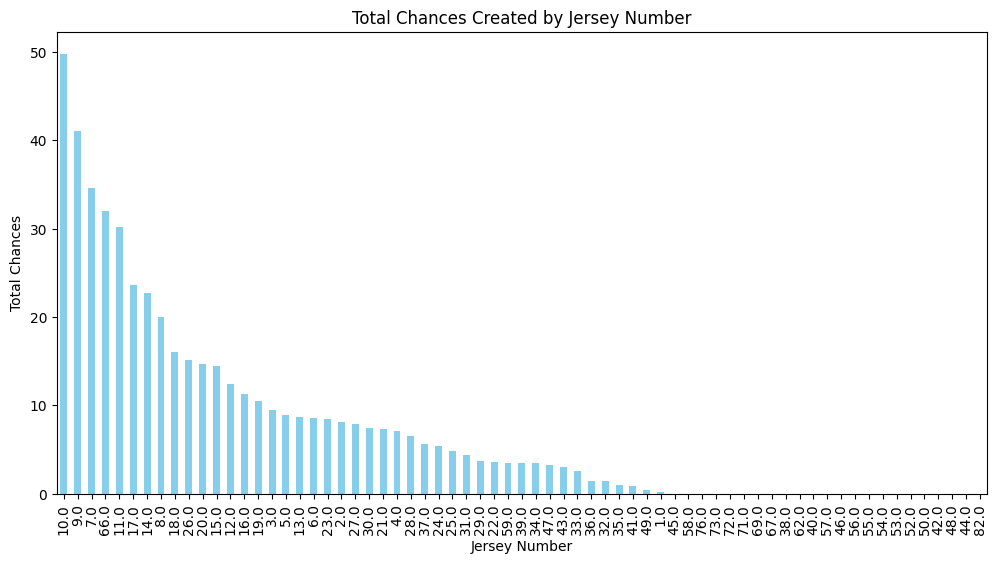

In [19]:
#plotting a graph of total chances by each jersey number
plt.figure(figsize=(12, 6))
jersey_num_total_chances.plot(kind='bar', color='skyblue')
plt.title('Total Chances Created by Jersey Number')
plt.xlabel('Jersey Number')
plt.ylabel('Total Chances')
plt.show()

we can see that jersey number 66 is on the 4th position. Generally jersey number 10,9,7,11 are given to players playing in forward position

In [20]:
df[df['Jersey Number']==66][['Name','Goals','Assists']]

,Name,Goals,Assists
295,Trent Alexander-Arnold,6,26


### Analysing Performance by Position

In [21]:
#calculating the number of players in each position
df['Position'].value_counts()

Position
Midfielder    198
Defender      194
Forward       110
Goalkeeper     69
Name: count, dtype: int64

In [22]:
#Segregatting the data with respect to the position.

Midfielder_data = df[df['Position'] == 'Midfielder']
Defender_data = df[df['Position']  =='Defender']
Forward_data = df[df['Position'] == 'Forward']
Goalkeeper_data = df[df['Position'] == 'Goalkeeper']

First we would calculate the chances forward created and ploting them on the graph.

In [23]:
#By describing the data would get to know the outline of the chances created by forward.
Forward_data['Total chances'].describe()

count    110.000000
mean      30.000000
std       41.168038
min        0.000000
25%        2.250000
50%       10.500000
75%       44.750000
max      226.000000
Name: Total chances, dtype: float64

In [24]:
#sort out the top 5 players by total chances 
striker = Forward_data.sort_values(by='Total chances',ascending=False).head()

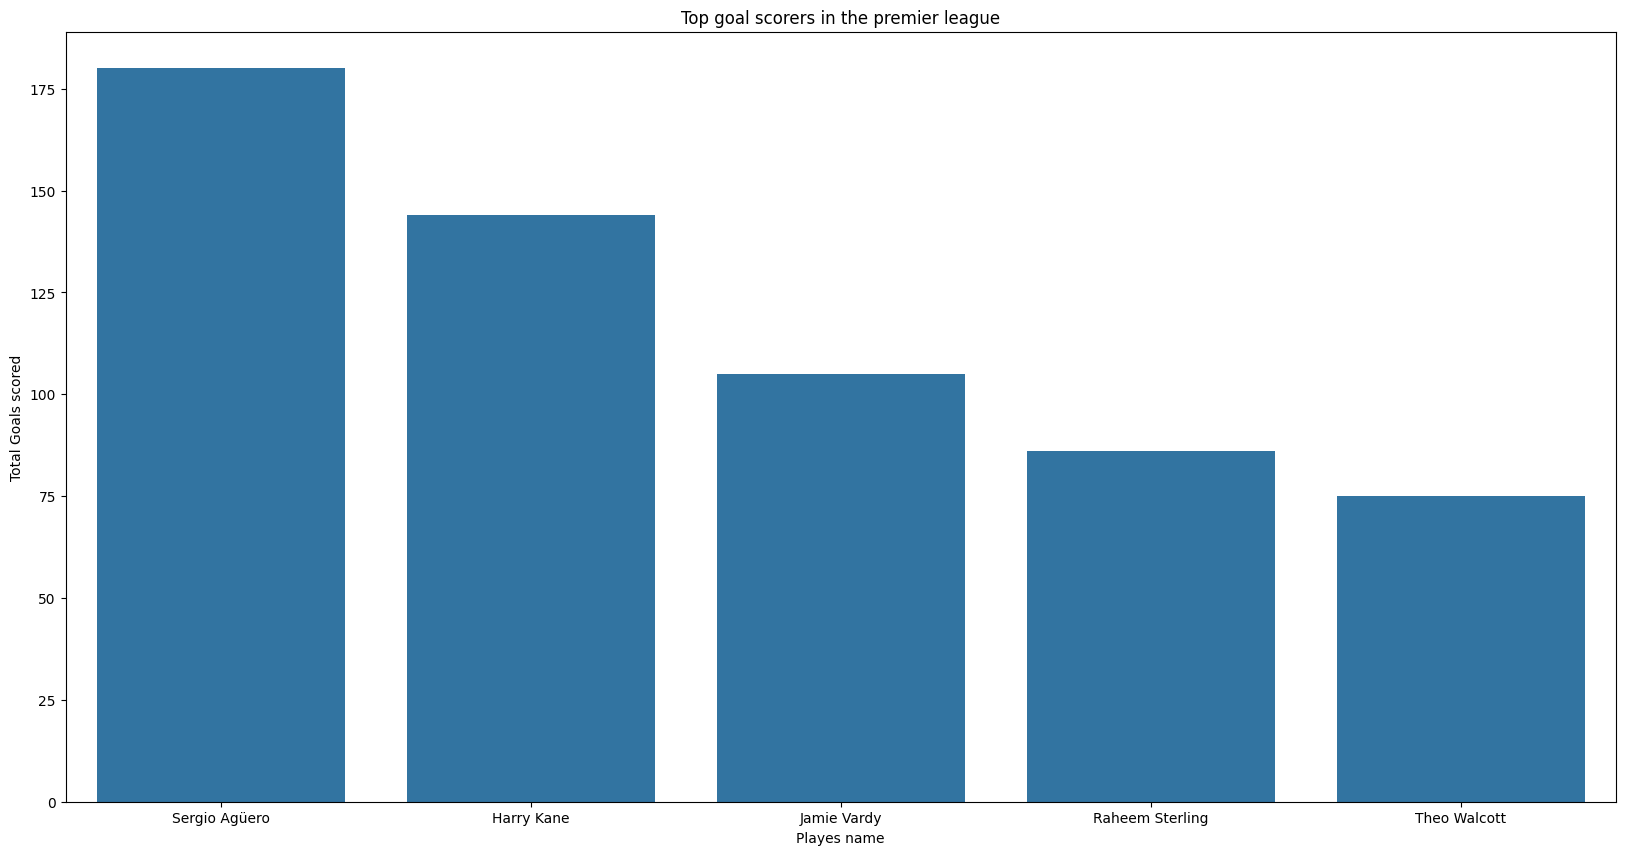

In [25]:
#ploting a bargraph for strikers
plt.figure(figsize=(20, 10))
sns.barplot(data=striker, y='Goals', x='Name')
plt.title('Top goal scorers in the premier league')
plt.xlabel('Playes name')
plt.ylabel('Total Goals scored')
plt.show()

Now we would calculate the chances forward created and ploting them on the graph.

In [26]:
#By describing the data would get to know the outline of the chances created by forward.
Midfielder_data['Total chances'].describe()

count    198.000000
mean      13.782828
std       22.167299
min        0.000000
25%        0.000000
50%        5.000000
75%       17.750000
max      139.000000
Name: Total chances, dtype: float64

In [31]:
#sort out the top 5 players by total chances 
Midfielder = Midfielder_data.sort_values(by='Total chances',ascending=False).head()

In [33]:
Midfielder_data.sort_values(by='Total chances',ascending=False).head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Total chances
302,James Milner,7.0,Liverpool,Midfielder,England,34.0,539,272,133,55,...,NaN,NaN,NaN,NaN,NaN,65,3,438,45.0,139
185,Gylfi Sigurdsson,10.0,Everton,Midfielder,Iceland,31.0,284,114,110,61,...,NaN,NaN,NaN,NaN,NaN,20,0,193,16.0,106
335,Kevin De Bruyne,17.0,Manchester-City,Midfielder,Belgium,29.0,156,109,22,37,...,NaN,NaN,NaN,NaN,NaN,14,0,122,16.0,104
365,Juan Mata,8.0,Manchester-United,Midfielder,Spain,32.0,262,136,61,51,...,NaN,NaN,NaN,NaN,NaN,19,1,134,102.0,103
13,Mesut Özil,10.0,Arsenal,Midfielder,Germany,31.0,184,100,39,33,...,NaN,NaN,NaN,NaN,NaN,13,0,95,83.0,87


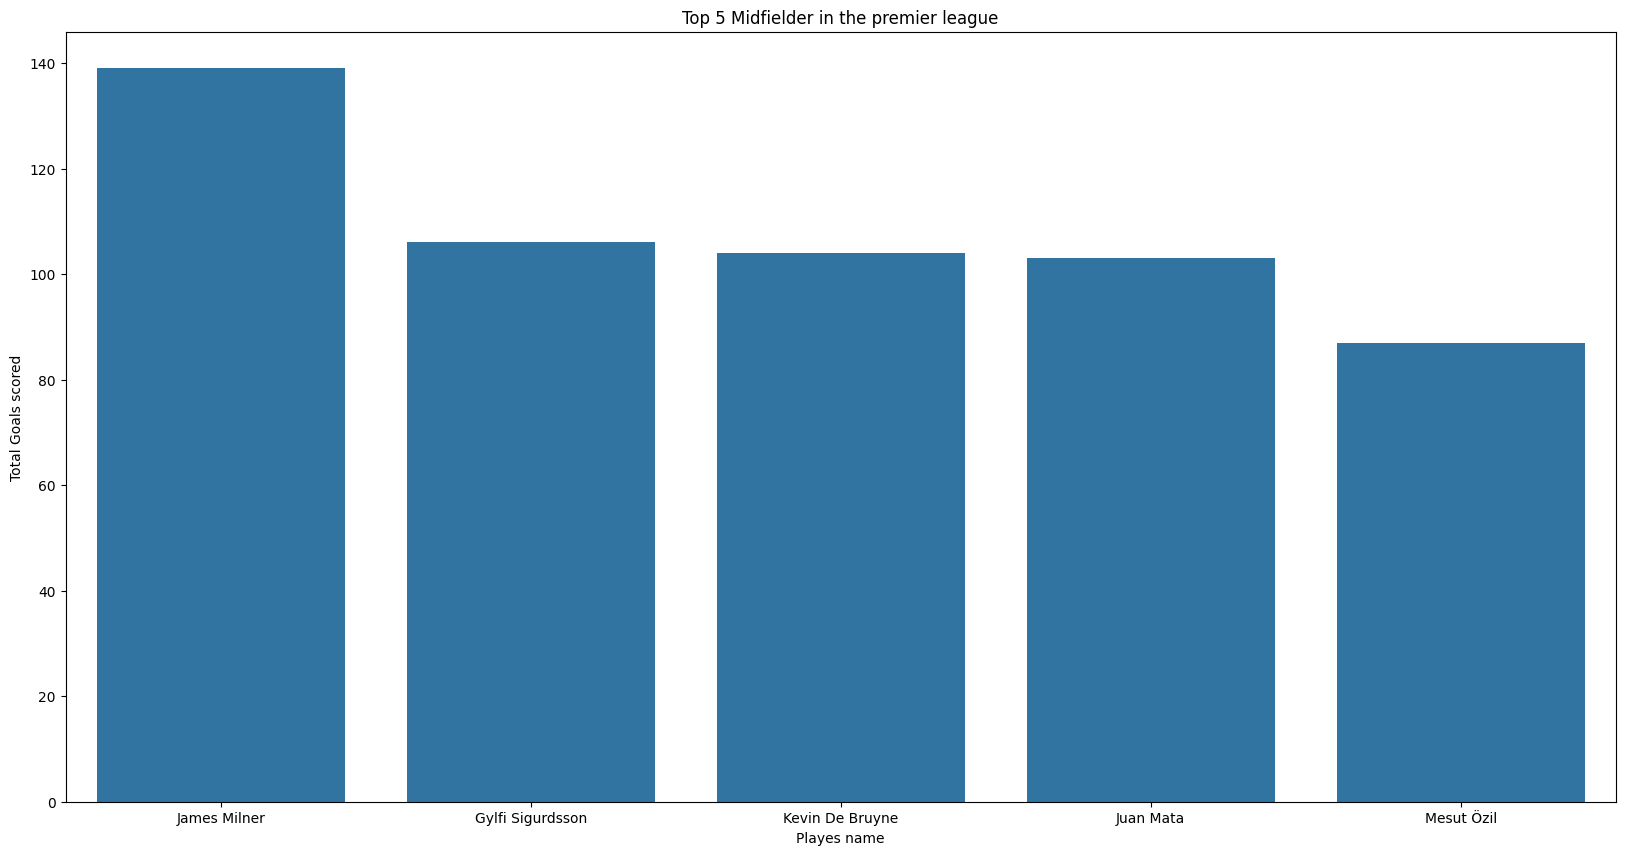

In [34]:
plt.figure(figsize=(20, 10))
sns.barplot(data=Midfielder, y='Total chances', x='Name')
plt.title('Top 5 Midfielder in the premier league')
plt.xlabel('Playes name')
plt.ylabel('Total Goals scored')
plt.show()

James milner is one of the prominent players in the liverpool squad. Sigurdsson is one of the most underrated players in the premier league.

Analysing defenders if they have impact on scoring goals.

In [36]:
#By describing the data would get to know the outline of the chances created by Defenders.
Defender_data['Total chances'].describe()

count    191.000000
mean       6.083770
std        9.190573
min        0.000000
25%        0.000000
50%        2.000000
75%        8.000000
max       42.000000
Name: Total chances, dtype: float64

In [37]:
#sort out the top 5 players by total chances
Defender_data.sort_values(by='Total chances', ascending=False).head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Total chances
504,Branislav Ivanovic,20,West-Bromwich-Albion,Defender,Serbia,36.0,261,152,50,22,...,NaN,NaN,NaN,NaN,NaN,55,2,293,18.0,42
180,Séamus Coleman,23,Everton,Defender,Ireland,31.0,276,114,79,20,...,NaN,NaN,NaN,NaN,NaN,29,2,194,29.0,41
122,César Azpilicueta,28,Chelsea,Defender,Spain,31.0,272,158,56,8,...,NaN,NaN,NaN,NaN,NaN,23,1,240,10.0,39
293,Andrew Robertson,26,Liverpool,Defender,Scotland,26.0,153,86,36,4,...,NaN,NaN,NaN,NaN,NaN,20,0,80,11.0,37
151,Gary Cahill,24,Crystal-Palace,Defender,England,34.0,374,166,126,27,...,NaN,NaN,NaN,NaN,NaN,38,3,266,3.0,37


## Analysing Performance by Age

In [38]:
#finding out the unique ages of players in the premier league
df['Age'].unique()

array([28., 26., 25., 23., 19., 32., 33., 27., 22., 31., 24., 21., 20.,
       29., 34., 30., 18., 35., 38., 36., 17., nan])

In [39]:
#checking of there is any null values
df['Age'].isnull().sum()

1

In [40]:
#droping the null value from the age column
df = df.dropna(subset=['Age'])

In [41]:
#checking if the null value is removed
df['Age'].isnull().sum()

0

In [42]:
#the values in the age column is float and need to change it as int value
df['Age'] = df['Age'].astype(int)

In [43]:
#By describing the data would get to know the outline of the age of players.
df['Age'].describe()

count    562.000000
mean      25.811388
std        4.360331
min       17.000000
25%       22.000000
50%       26.000000
75%       29.000000
max       38.000000
Name: Age, dtype: float64

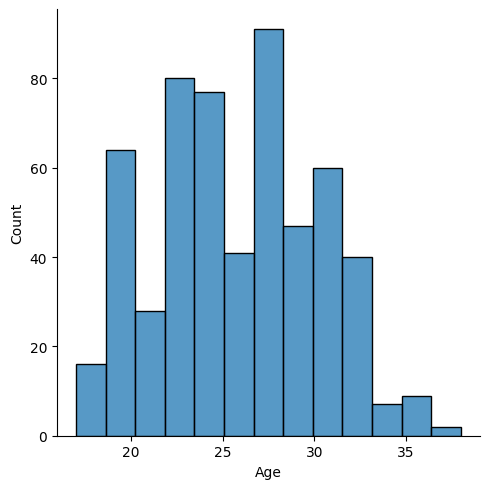

In [44]:
#by this we can understand that it has a bell curve which represent it is a normal distribution.
sns.displot(data=df,x='Age')

In [45]:
#unique age in the column
df['Age'].unique()

array([28, 26, 25, 23, 19, 32, 33, 27, 22, 31, 24, 21, 20, 29, 34, 30, 18,
       35, 38, 36, 17])

In [52]:
#by having a pivot table we can see the goals, assists and Total chances with respect to the age.
age_groups = df.pivot_table(index='Age', values=['Goals', 'Assists', 'Total chances'], aggfunc = np.mean)

C:\Users\91813\AppData\Local\Temp\ipykernel_29900\3519655748.py:1: FutureWarning: The provided callable <function mean at 0x0000022EFEFE2B90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  age_groups = df.pivot_table(index='Age', values=['Goals', 'Assists', 'Total chances'], aggfunc = np.mean)


<Axes: xlabel='Age'>

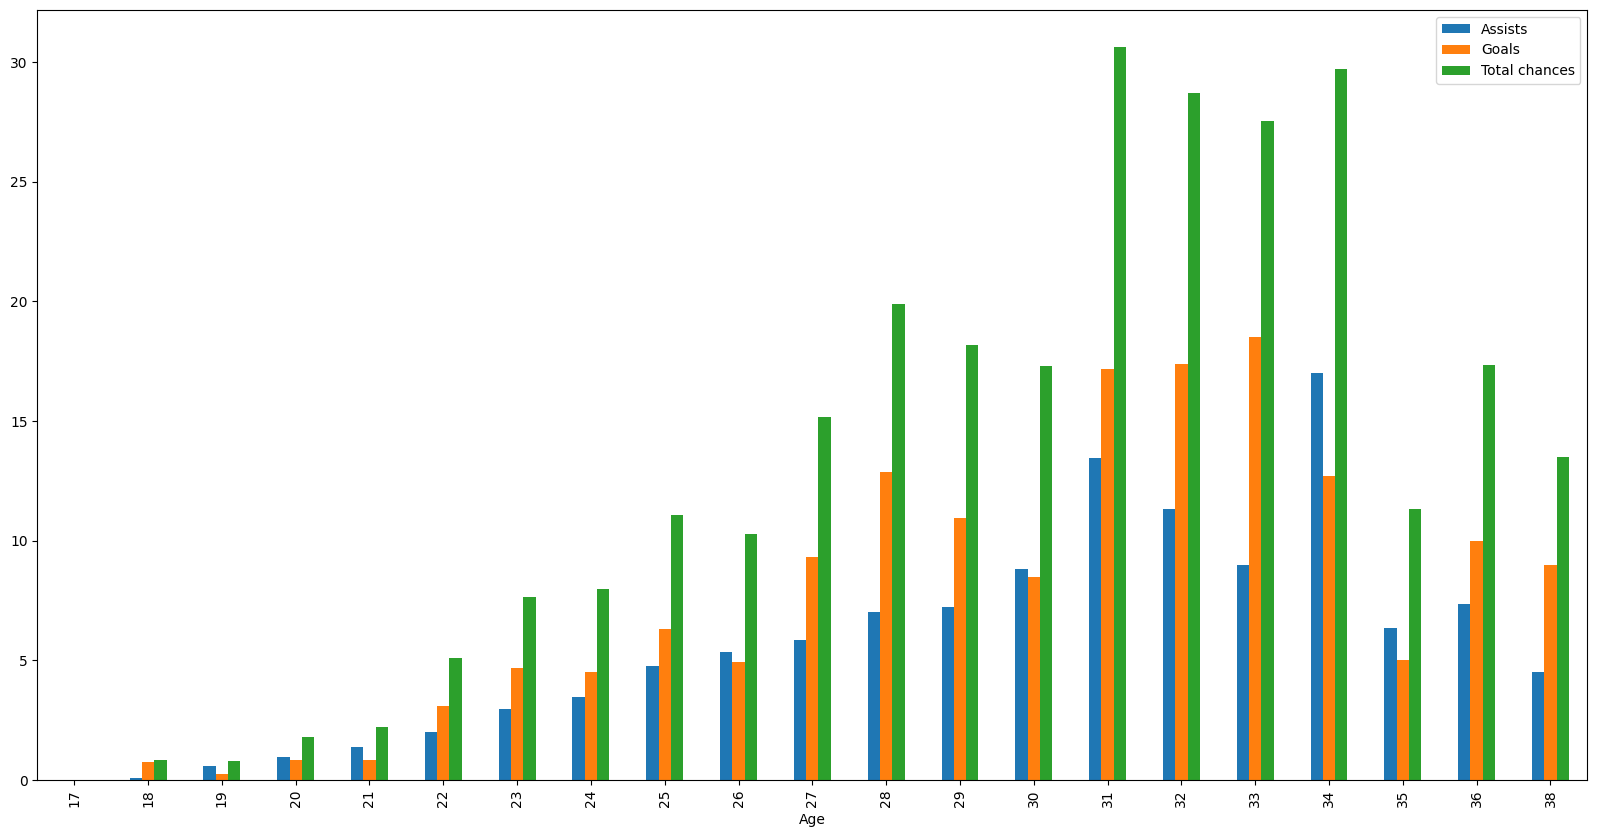

In [54]:
#plotting the table as a graph
age_groups.plot(kind='bar', figsize=(20,10))

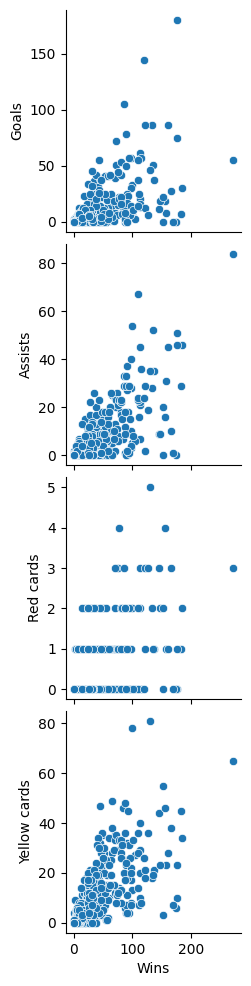

In [59]:
sns.pairplot(data=df, x_vars='Wins', y_vars=['Goals', 'Assists', 'Red cards', 'Yellow cards'], kind='scatter')